Приближенное решение: 
При m = 1 решение: y = (1 - x) +  -0.539 *x*(1-x)
Приближенное решение: 
При m = 2 решение: y = (1 - x) +  -0.378 *x*(1-x) +  -0.256 x^2*(1-x)
Приближенное решение: 
При m = 3 решение: y = (1 - x) +  -0.382 *x*(1-x) +  -0.395 x^2*(1-x) +  0.155 x^3*(1-x)


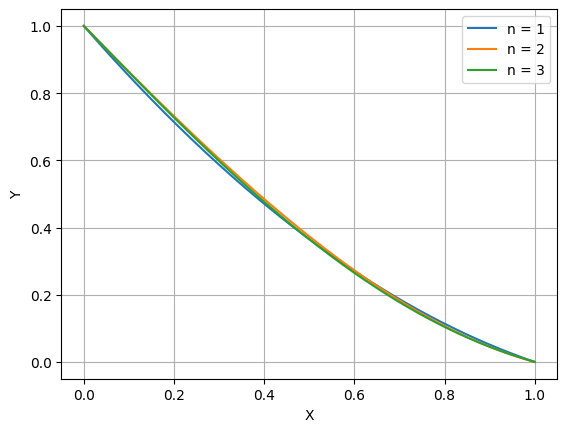

In [11]:
### Expression to solve y'' + x * y' + y = 2x
### Problem solved by the MSM
### find the funcion to minimise
# uo(x) = (1-x)
# uk(x) = x**k * (1 - x)
# u1(x) = x * (1 - x)
# u2(x) = x**2 * (1 - x)
# u3(x) = x**3 * (1 - x)
from numpy import arange
import matplotlib.pyplot as plt

limit_1 = 0
limit_2 = 1
step = 0.1

def a(x):
    return -2 * x 

def b(x):
    return -2 + 2 *x - 3 * x * x 

def c(x):
    return -4 * x * x * x + 3 * x * x - 6 * x + 2

def d(x):
    return -5 * x * x * x * x + 4 * x * x * x - 12 * x * x + 6 * x 

def u0(x):
    return (1 - x)

def u1(x):
    return x * (1 - x)

def u2(x):
    return x * x * (1 - x)

def u3(x):
    return x ** 3 * (1 - x)

list_polinom = [u0, u1, u2, u3]

def sum_2(func1, func2):
    total = 0
    for i in range(int(1 / 0.1)):
        total += func1(limit_1 + step * i) * func2(limit_2 + step * i)
    return total 

def method_gauss(matrix):
    n = len(matrix)
    for k in range(n):
        for i in range(k + 1, n):
            coeff = -(matrix[i][k] / matrix[k][k])
            for j in range(k, n + 1):
                matrix[i][j] += coeff * matrix[k][j]
    a = [0 for i in range(n)]
    for i in range(n - 1, -1, -1):
        for j in range(n - 1, i, -1):
            matrix[i][n] -= a[j] * matrix[i][j]
        a[i] = matrix[i][n] / matrix[i][i]
    return a
list_func = [a, b, c, d]


def matrix_1():
    matrix = []
    for i in range(1):
        row = []
        row.append(sum_2(b, list_func[i + 1]))
        row.append(sum_2(a, list_func[i + 1]) * -1)
        matrix.append(row)
    return matrix

def matrix_2():
    matrix = []
    for i in range(2):
        row = []
        row.append(sum_2(b, list_func[i + 1]))
        row.append(sum_2(c, list_func[i + 1]))
        row.append(sum_2(a, list_func[i + 1]) * -1)
        matrix.append(row)
    return matrix

def matrix_3():
    matrix = []
    for i in range(3):
        row = []
        row.append(sum_2(b, list_func[i + 1]))
        row.append(sum_2(c, list_func[i + 1]))
        row.append(sum_2(d, list_func[i + 1]))
        row.append(sum_2(a, list_func[i + 1]) * -1)
        matrix.append(row)
    return matrix

def add_plot(coeffs, label, start, end):
    my_x = list()
    my_y = list()
    step = (end - start) / 1000
    for x in arange(start, end + step, step):
        my_x.append(x)
        y = list_polinom[0](x)
        for i in range(len(coeffs)):
            y += coeffs[i] * list_polinom[i + 1](x)
        my_y.append(y)

    plt.plot(my_x, my_y, label=label)

def draw_result():
    plt.legend()

    plt.xlabel('X') 
    plt.ylabel('Y')

    plt.grid()
    plt.show()
    
if __name__ == "__main__":
    matrix1 = matrix_1()
    matrix2 = matrix_2()
    matrix3 = matrix_3()
    

    coeff_1 = method_gauss(matrix1)
    print("Приближенное решение: ")
    print("При m = 1 решение: y = (1 - x) + ", round(coeff_1[0], 3), "*x*(1-x)")


    coeff_2 = method_gauss(matrix2)
    print("Приближенное решение: ")
    print("При m = 2 решение: y = (1 - x) + ", round(coeff_2[0], 3), "*x*(1-x) + ", round(coeff_2[1], 3), "x^2*(1-x)")

    coeff_3 = method_gauss(matrix3)
    print("Приближенное решение: ")
    print("При m = 3 решение: y = (1 - x) + ", round(coeff_3[0], 3), "*x*(1-x) + ",
                     round(coeff_3[1], 3), "x^2*(1-x) + ", round(coeff_3[2], 3), "x^3*(1-x)")

    add_plot(coeff_1, "n = 1", 0, 1)
    add_plot(coeff_2, "n = 2", 0, 1)
    add_plot(coeff_3, "n = 3", 0, 1)
    draw_result()
